# Applied Machine Learning

## Frame

Your are startup.ai and you give loans out (non-asset backed loans). You have really high defaults. You are supposed to solve the problem

...

Outcome Variable: 
 - default
 
Demographic Variables
 - age
 - income
 - years
 - ownership
 
Behavioural Variables
 - grade
 - amount

## Acquire

Where do we get from:
- Flat files (csv, tsv) 
- Databases {pandas, sql-alchemy}
- API {requests}
- Scraping {beautiful-soup, scrapy}

Data Size Implication
- Small to Medium (In-Memory) : pandas, modin
- Medium to Large (In-HDD): dask
- Large to Extra-Large (Cluster): spark

Data Fields - Each observation / row is one client
- default: Whether defaulted(1) or not (0)
- amount: Amount lent out to the client
- grade: Equivalent to FICO / CIBIL scores (A>B>C...)
- years: Years of employment / working
- ownership: What type of accomodation they own
- income: income they earn
- age: reported years by them

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use("ggplot")

In [3]:
df = pd.read_csv("data/historical_loan.csv")

In [4]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


# Refine

- Missing Values
- Quality Check
- Outliers
- Standardize e.g. Bengaluru & Bangalore

In [6]:
# Missing Values
df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

Missing Value Treatment

1. REMOVE THE Column OR Rows
2. Statistical IMPUTE: Measure: Mean, Median and Mode
    - Nominal, Ordinal: Mode, Create New Category
    - Ratio: Median, Mean
    - Interval: Last Known or Next Value
3. Domain Specific or Fixed Number: 9999
4. BINNING: Convert to CATEGORICAL
5. MODEL: Nearest Neighbour
      

In [7]:
df.years = df.years.fillna(np.mean(df.years))

In [10]:
df.years.mean()

6.0863319011815245

In [9]:
df.years.unique()

array([ 2.       ,  3.       ,  1.       ,  6.       ,  4.       ,
        0.       , 16.       , 12.       , 11.       , 15.       ,
        6.0863319, 18.       ,  8.       ,  7.       , 34.       ,
        9.       , 14.       ,  5.       , 10.       , 20.       ,
       26.       , 19.       , 24.       , 61.       , 27.       ,
       21.       , 13.       , 30.       , 23.       , 22.       ,
       31.       , 25.       , 17.       , 38.       , 28.       ,
       29.       , 56.       , 47.       , 45.       , 43.       ,
       32.       , 33.       , 36.       , 40.       , 44.       ,
       53.       , 41.       , 55.       , 62.       , 48.       ,
       37.       , 35.       ])

## Explore

Class Balance
- Balanced (60/40, 70/30) - Normal Classification Process
- UnBalanced (90/10. 95/5)
   - `class_weight` hyper parameter
   - {sklearn-unbalanced}
- Anomaly Detection/ Severely Unbalanced (99.9 /0.01)
   - PCA-based Techniques
   - ...

#### Single Variable Vis

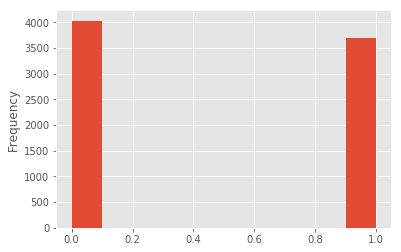

In [12]:
df.default.plot.hist();

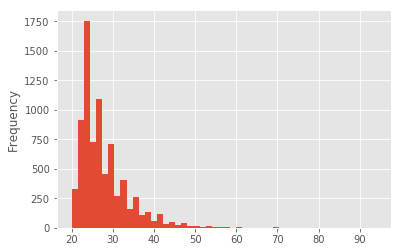

In [17]:
df.age.plot.hist(bins = 50);

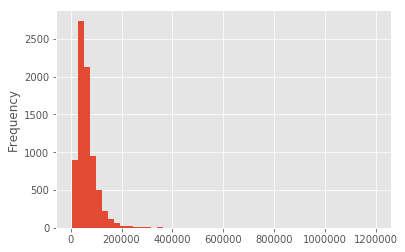

In [18]:
df.income.plot.hist(bins = 50);

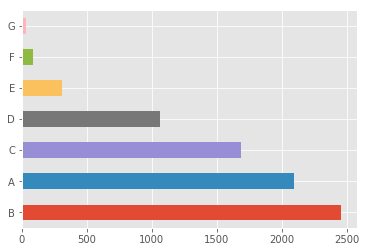

In [30]:
df.grade.value_counts().plot.barh();

### Dual / Triple Variable Exploration

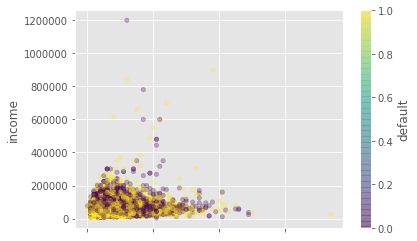

In [24]:
df.plot.scatter(x="age", y="income", c="default", alpha=0.3, cmap="viridis");

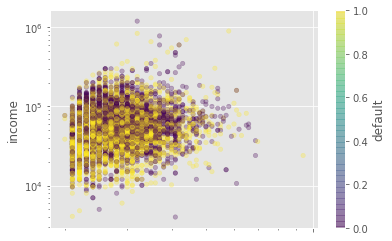

In [25]:
df.plot.scatter(x="age", y="income", c="default", alpha=0.3, cmap="viridis",
               logx=True, logy=True);

## Transform

- Encoding:
    - Label Encoding: Can work for Ordinal (but not nominal)
    - One-Hot Encoding: Can work for both but sparsity needs to be handled
- Normalisation
    - Standard Scaler
    - Normalizer
- Feature Creation

In [36]:
dfX = df.copy()

In [31]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


### Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le_grade = LabelEncoder()
le_ownership = LabelEncoder()

In [35]:
# Fit the label encoder
le_grade.fit(df.grade)
le_ownership.fit(df.ownership)

LabelEncoder()

In [38]:
dfX["grade"] = le_grade.transform(df.grade)
dfX["ownership"] = le_ownership.transform(df.ownership)

In [41]:
le_grade.classes_, le_ownership.classes_

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object))

### Transformation

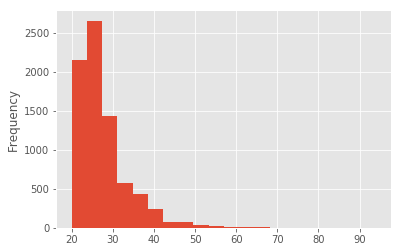

In [50]:
df.age.plot.hist(bins=20)

In [48]:
# Transform - Log
dfX["income"] = np.log(df.income)
dfX["amount"] = np.log(df.amount)
dfX["age"] = np.log(df.age)

In [49]:
dfX.head()

,default,amount,grade,years,ownership,income,age
0,0,6.907755,1,2.0,3,9.862666,3.178054
1,1,8.779557,0,2.0,0,11.097410,3.332205
2,0,7.783224,0,2.0,3,11.002100,3.583519
3,0,9.210340,2,3.0,3,11.034890,3.178054
4,1,8.294050,2,2.0,3,9.903488,3.332205
